In [3]:
#Mount Google Drive to Colab VM#
from google.colab import drive
drive.mount('/content/drive')

#Navigate to root working folder#
%cd /content/drive/My Drive/Springboard/miniProjects/Storytelling_Broadband

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Springboard/miniProjects/Storytelling_Broadband


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

In [5]:
df = pd.read_csv("data_cleaned_2021.csv", index_col=False)  #Import data

In [6]:
print(df.info())
print(list(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [7]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [8]:
#deleting columns I'm not interested in, all I really care about is Where, how much, sector and skills
df.drop(columns=['index', 'Job Description', 'Rating', 'Company Name', 'Headquarters', 'Size', 'Founded', 'Revenue', 'Competitors', 'Lower Salary', 'Upper Salary', 'Age', 'seniority_by_title', 'Job Title', 'Salary Estimate', 'Industry', 'company_txt'], inplace=True)

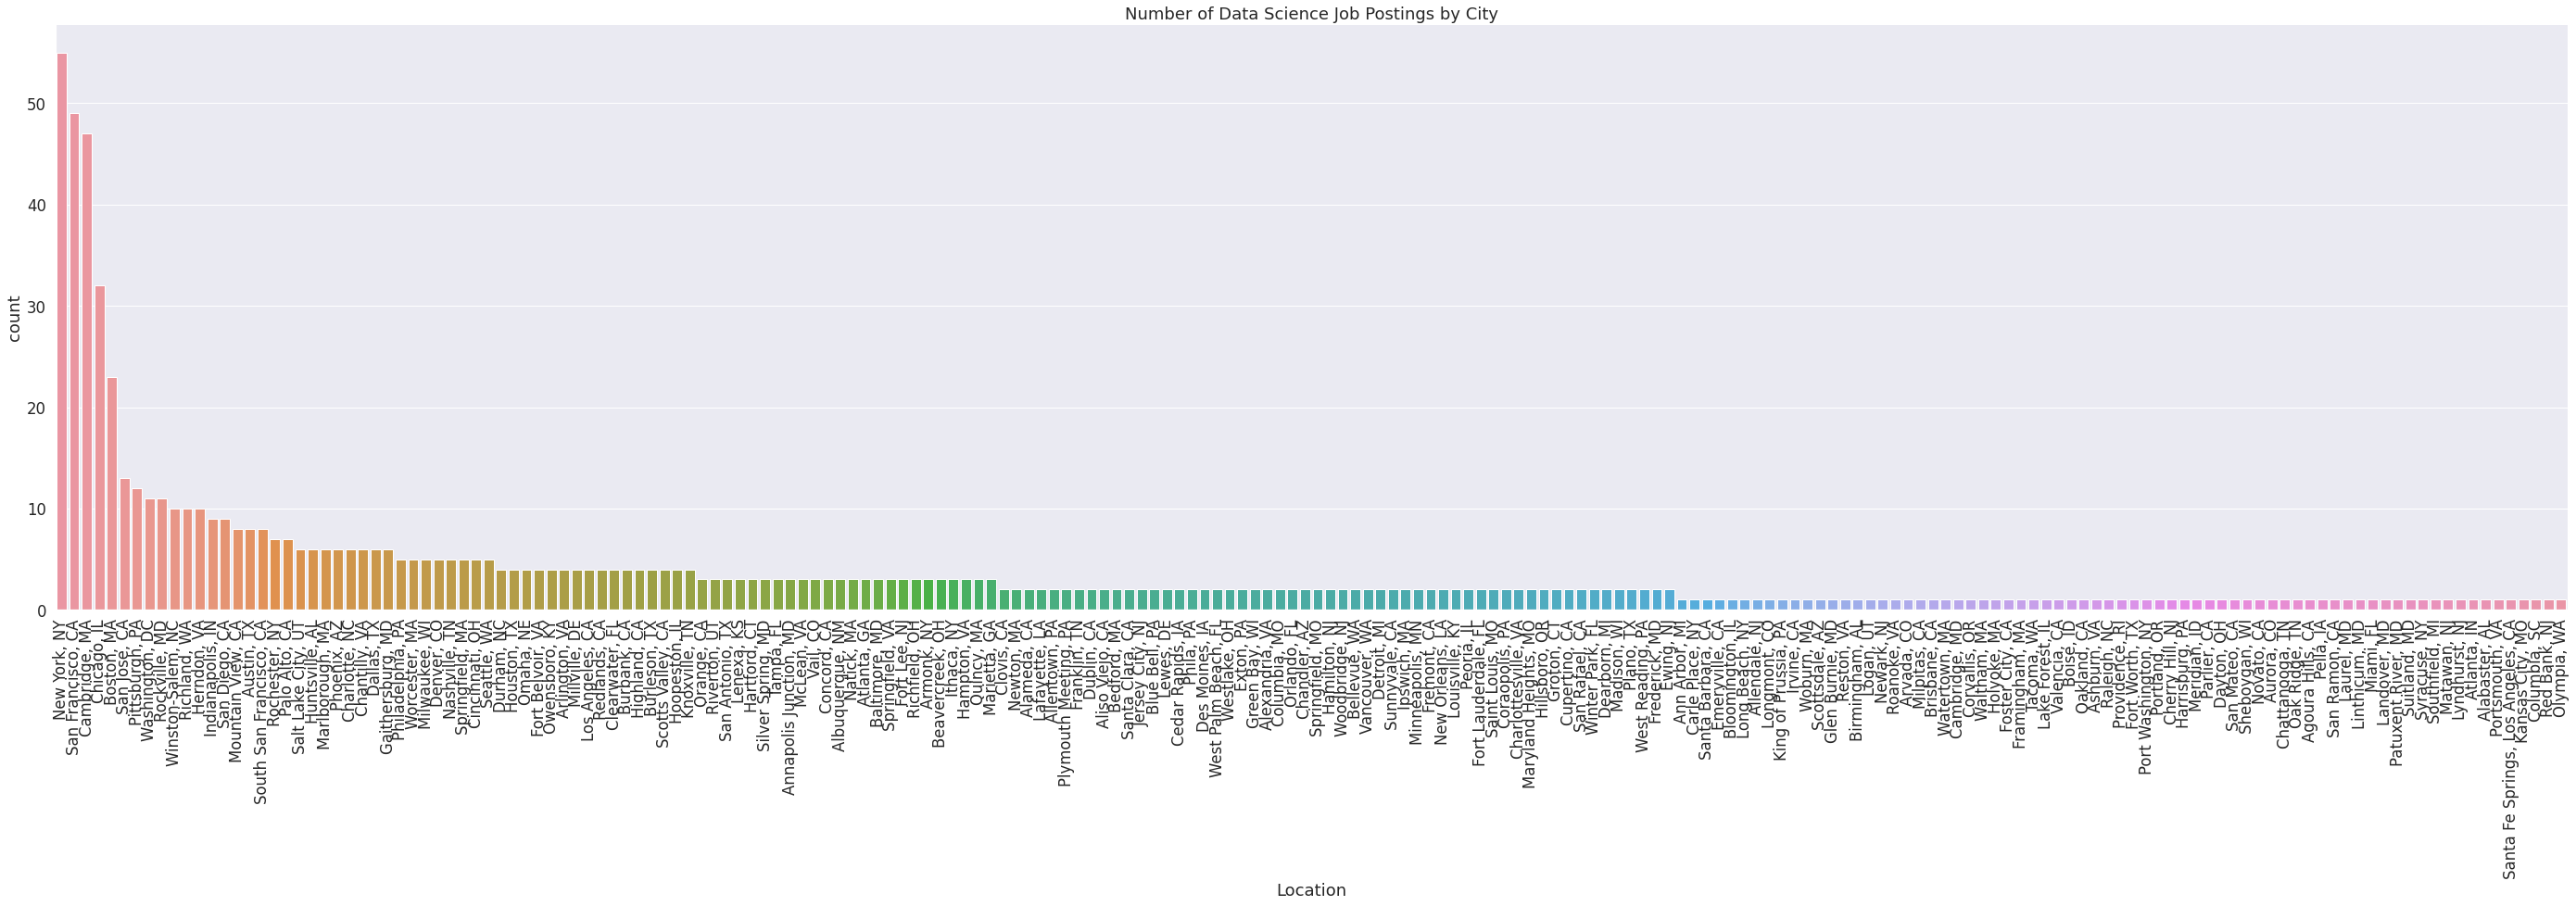

In [9]:
sns.catplot(x='Location', kind='count', order=df['Location'].value_counts().index, height=10, aspect= 4, data=df).set_xticklabels(rotation=90)
plt.title("Number of Data Science Job Postings by City")
plt.show()

In [10]:
print('Top 10 Cities with the most Data Science Job Postings')
print(df['Location'].value_counts().head(10))

Top 10 Cities with the most Data Science Job Postings
New York, NY         55
San Francisco, CA    49
Cambridge, MA        47
Chicago, IL          32
Boston, MA           23
San Jose, CA         13
Pittsburgh, PA       12
Washington, DC       11
Rockville, MD        11
Winston-Salem, NC    10
Name: Location, dtype: int64


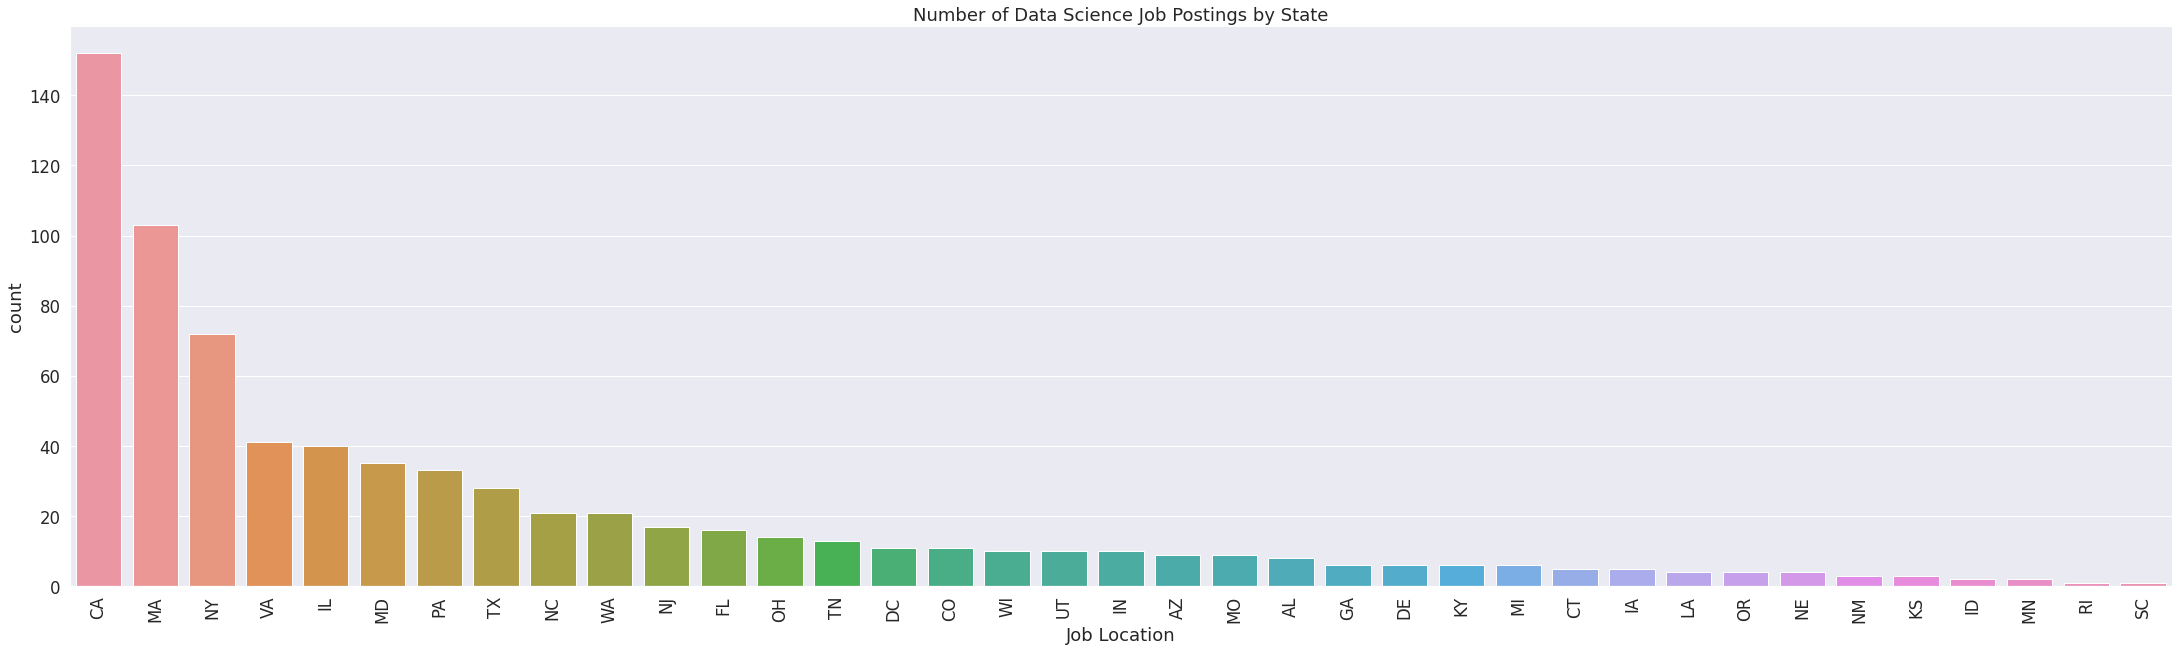

In [11]:
sns.catplot(x='Job Location', kind='count', order=df['Job Location'].value_counts().index, height=9, aspect= 3.4, data=df).set_xticklabels(rotation=90)
plt.title("Number of Data Science Job Postings by State")
plt.show()

In [12]:
print('Top 10 Cities with the most Data Science Job Postings')
print(df['Job Location'].value_counts().head(10))

Top 10 Cities with the most Data Science Job Postings
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
Name: Job Location, dtype: int64


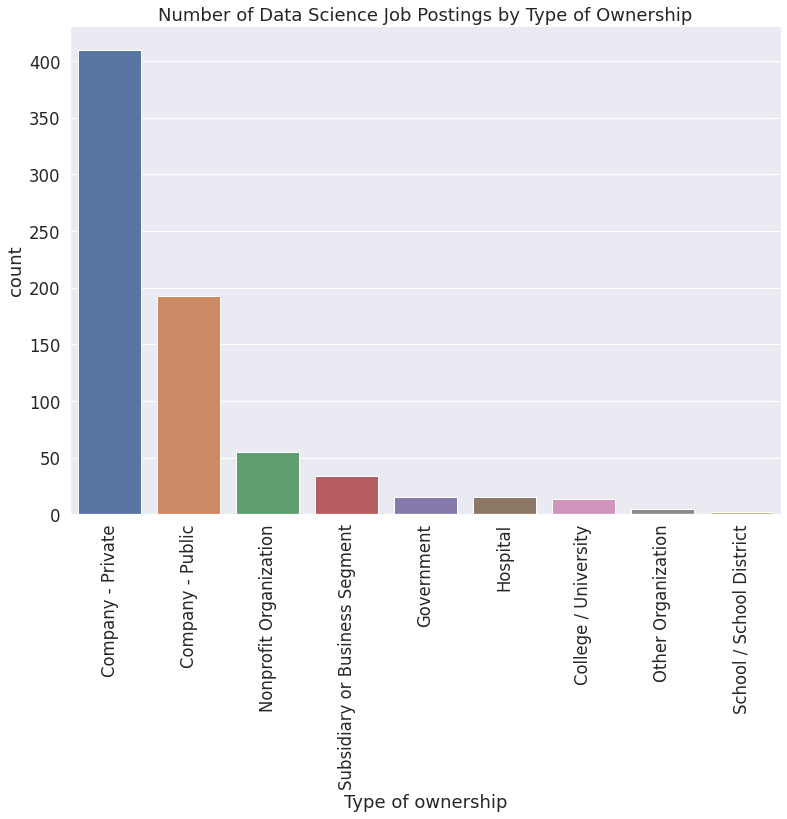

In [13]:
sns.catplot(x='Type of ownership', kind='count', order=df['Type of ownership'].value_counts().index, height=8, aspect= 1.5, data=df).set_xticklabels(rotation=90)
plt.title("Number of Data Science Job Postings by Type of Ownership")
plt.show()

In [14]:
print('Top 10 sectors with the most Data Science Job Postings')
print(df['Type of ownership'].value_counts().head(10))

Top 10 sectors with the most Data Science Job Postings
Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64


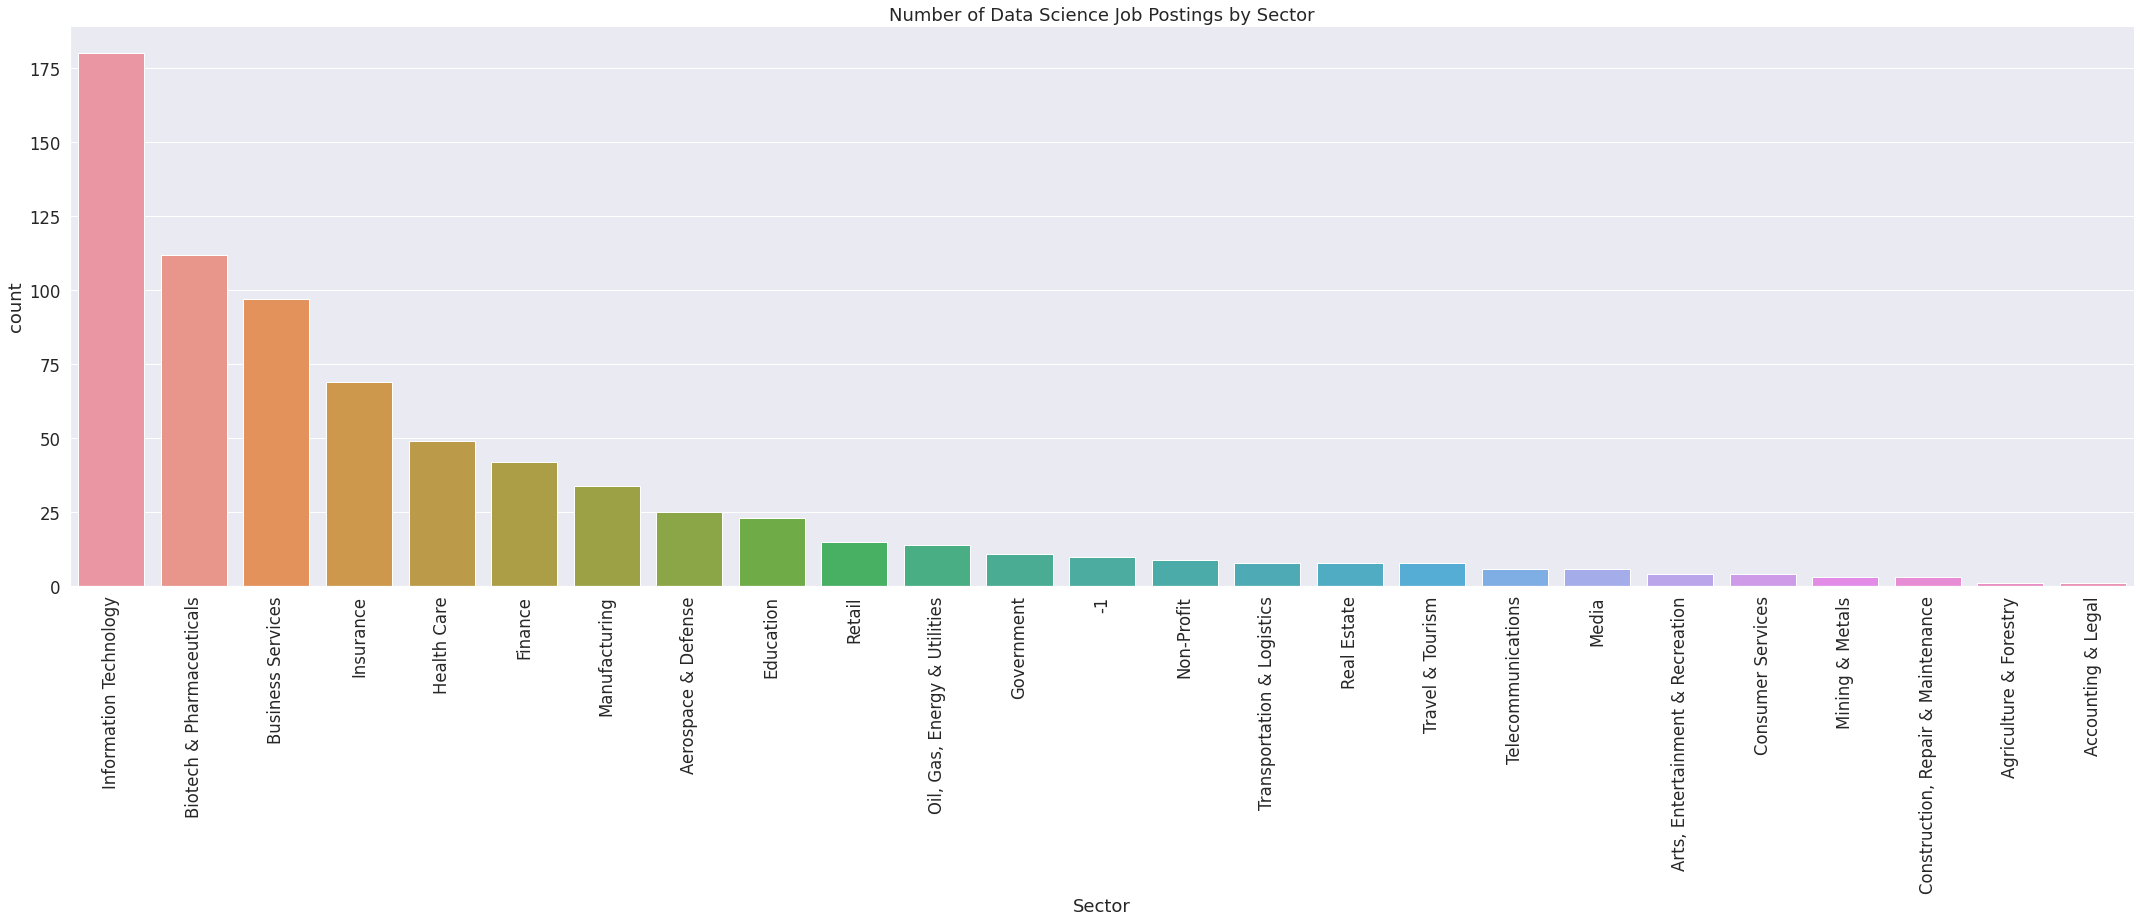

In [15]:
sns.catplot(x='Sector', kind='count', order=df['Sector'].value_counts().index, height=9, aspect= 3.4, data=df).set_xticklabels(rotation=90)
plt.title("Number of Data Science Job Postings by Sector")
plt.show()

In [16]:
print('Top 10 sectors with the most Data Science Job Postings')
print(df['Sector'].value_counts().head(10))

Top 10 sectors with the most Data Science Job Postings
Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Finance                       42
Manufacturing                 34
Aerospace & Defense           25
Education                     23
Retail                        15
Name: Sector, dtype: int64


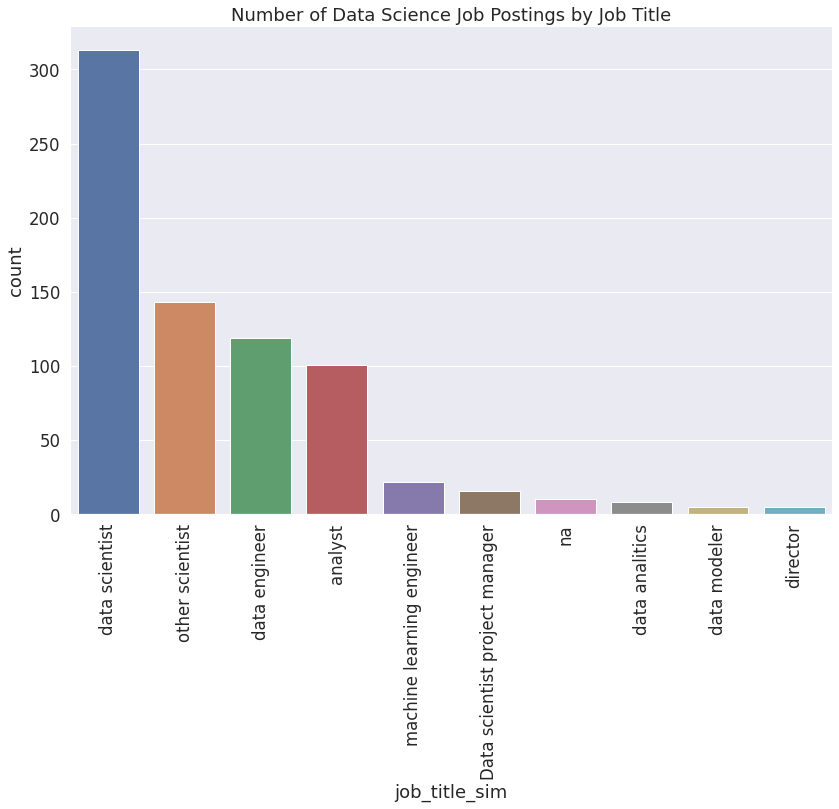

In [17]:
sns.catplot(x='job_title_sim', kind='count', order=df['job_title_sim'].value_counts().index, height=8, aspect= 1.5, data=df).set_xticklabels(rotation=90)
plt.title("Number of Data Science Job Postings by Job Title")
plt.show()

In [18]:
print('Top 10 Job Titles among Postings')
print(df['job_title_sim'].value_counts().head(10))

Top 10 Job Titles among Postings
data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64


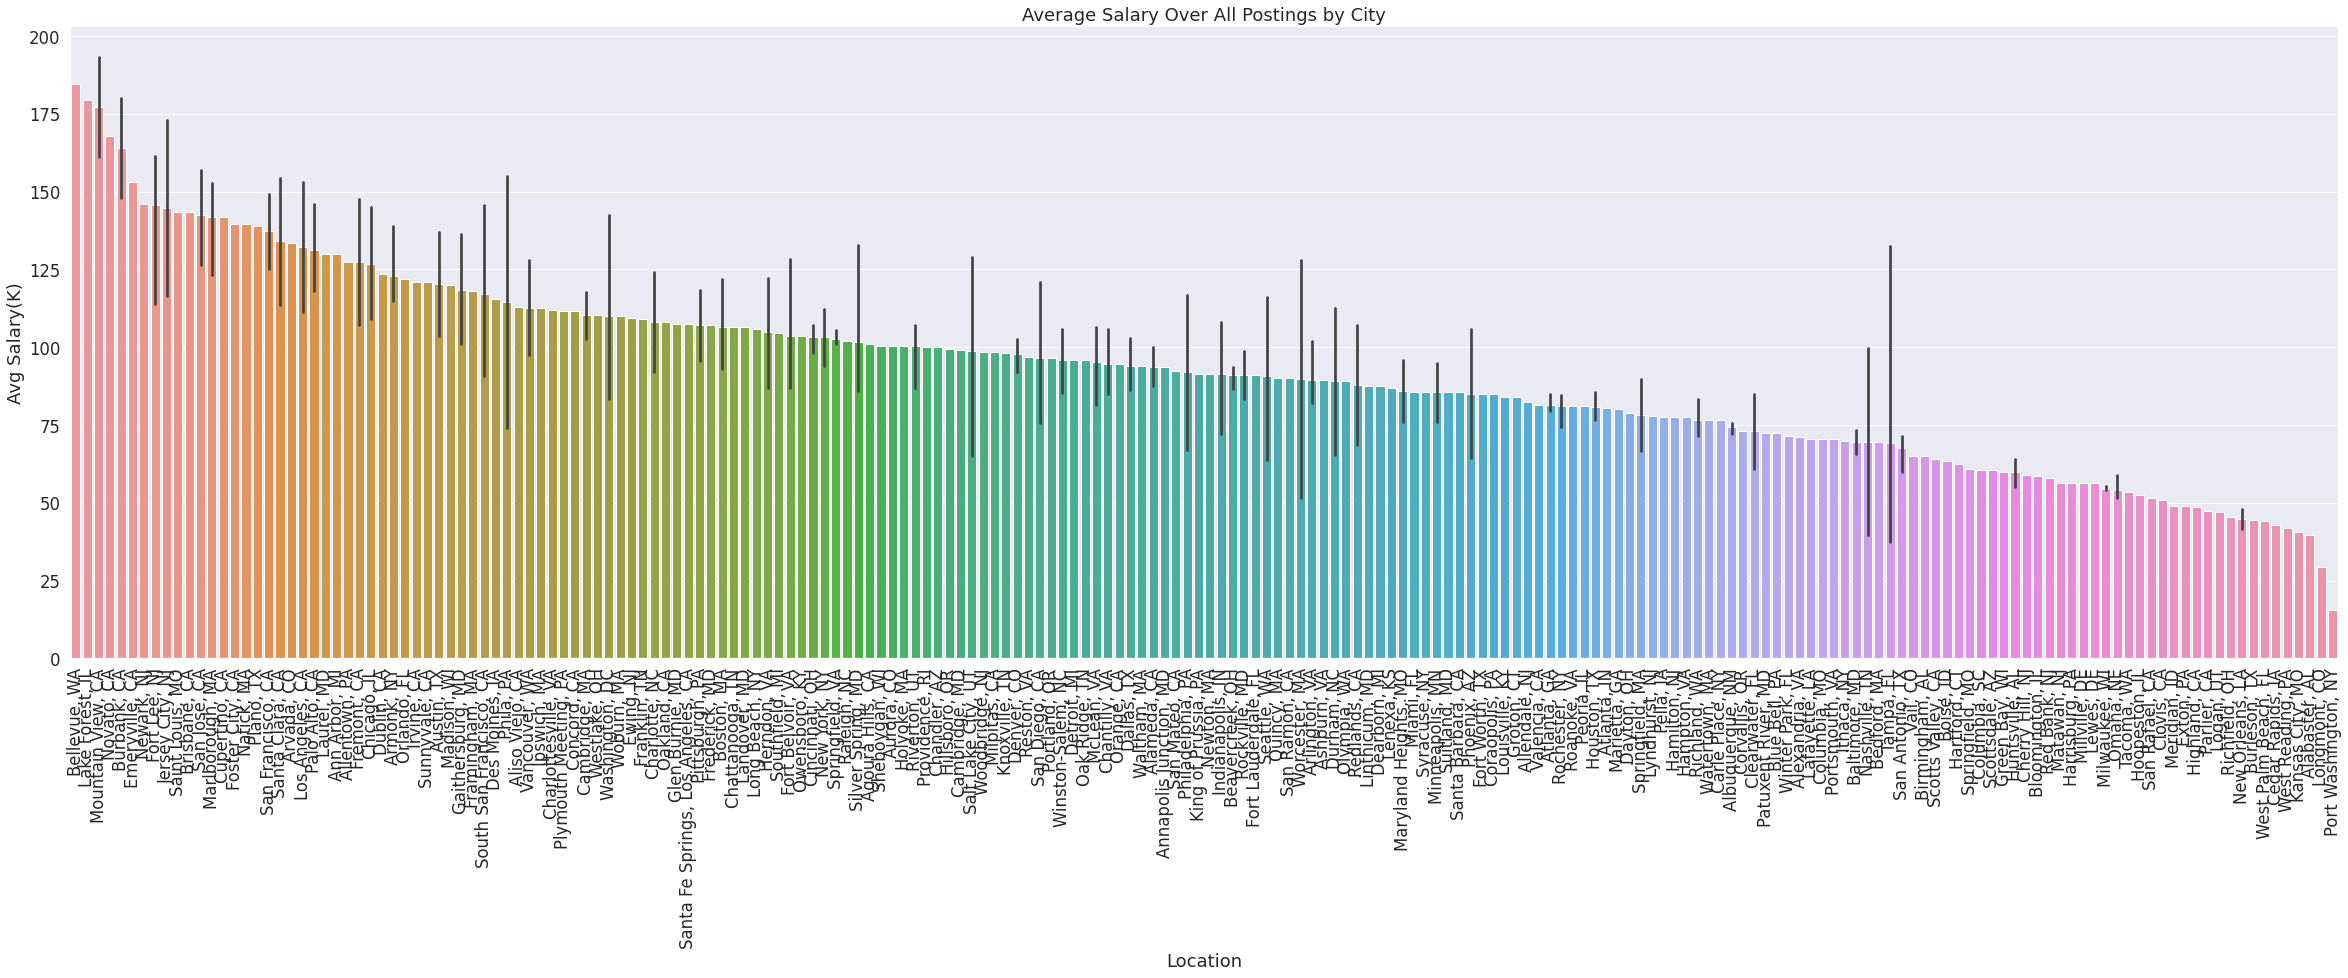

In [19]:
sns.catplot(x='Location', y='Avg Salary(K)', order=df.groupby('Location')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).index, kind='bar', height=10, aspect= 3.4, data=df).set_xticklabels(rotation=90)
plt.title("Average Salary Over All Postings by City")
plt.show()

In [20]:
# listing top 20 results
print('Top 10 Citys Based on Salary')
list(df.groupby('Location')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).head(10).index)

Top 10 Citys Based on Salary


['Bellevue, WA',
 'Lake Forest, IL',
 'Mountain View, CA',
 'Novato, CA',
 'Burbank, CA',
 'Emeryville, CA',
 'Newark, NJ',
 'Fort Lee, NJ',
 'Jersey City, NJ',
 'Saint Louis, MO']

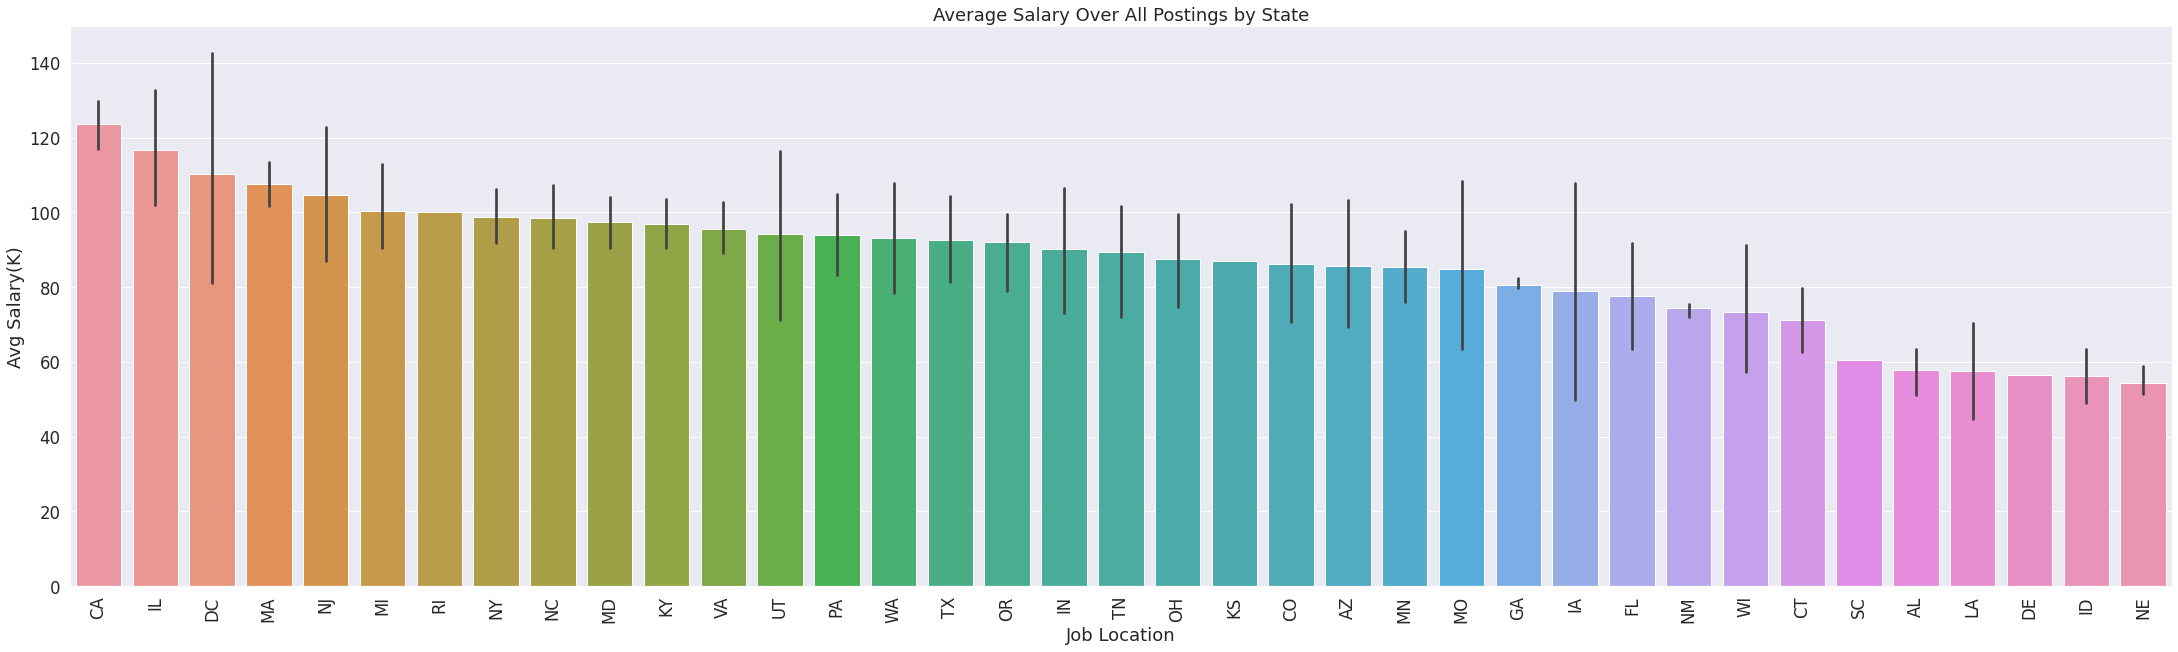

In [21]:
sns.catplot(x='Job Location', y='Avg Salary(K)', order=df.groupby('Job Location')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).index, kind='bar', height=9, aspect= 3.4, data=df).set_xticklabels(rotation=90)
plt.title('Average Salary Over All Postings by State')
plt.show()

In [22]:
print('Top 10 States Based on Salary')
list(df.groupby('Job Location')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).head(10).index)

Top 10 States Based on Salary


['CA', 'IL', 'DC', 'MA', 'NJ', 'MI', 'RI', 'NY', 'NC', 'MD']

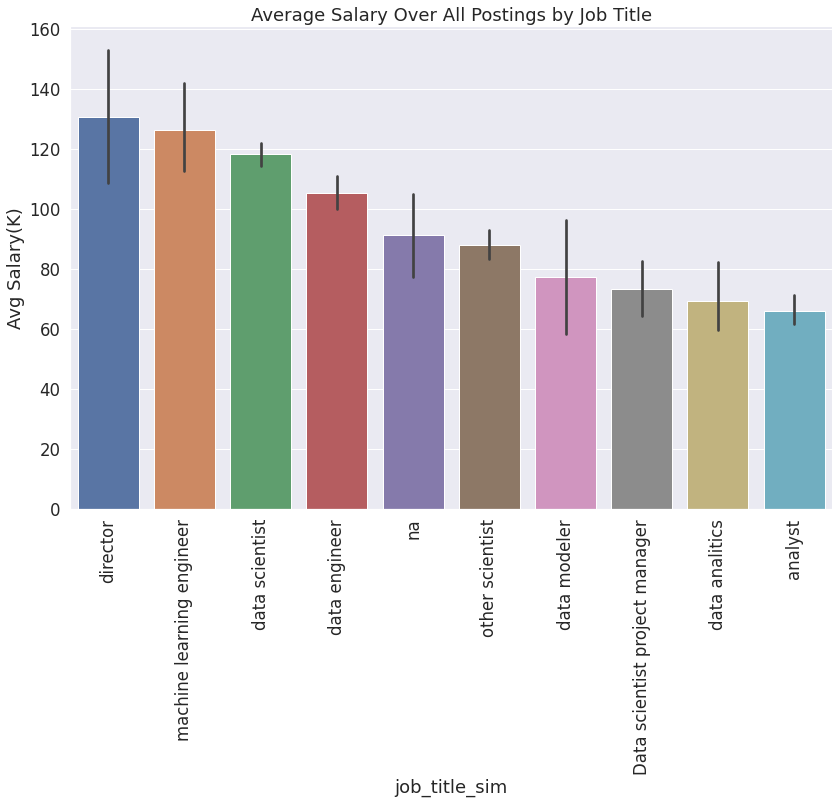

In [23]:
sns.catplot(x='job_title_sim', y='Avg Salary(K)', order=df.groupby('job_title_sim')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).index, kind='bar', height=8, aspect= 1.5, data=df).set_xticklabels(rotation=90)
plt.title('Average Salary Over All Postings by Job Title')
plt.show()

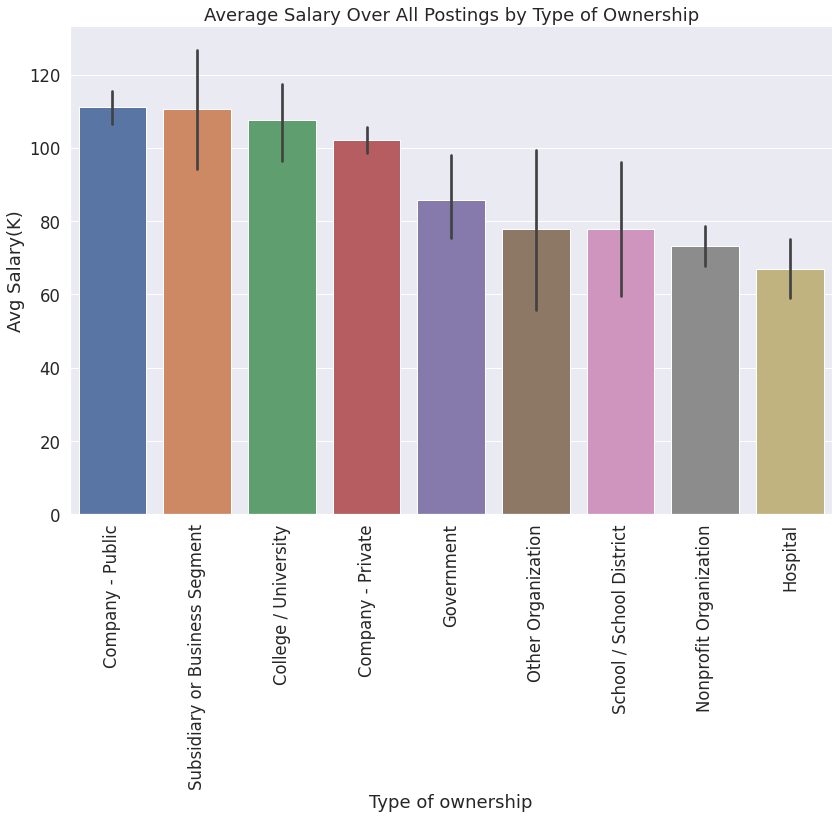

In [24]:
sns.catplot(x='Type of ownership', y='Avg Salary(K)', order=df.groupby('Type of ownership')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).index, kind='bar', height=8, aspect=1.5, data=df).set_xticklabels(rotation=90)
plt.title('Average Salary Over All Postings by Type of Ownership')
plt.show()

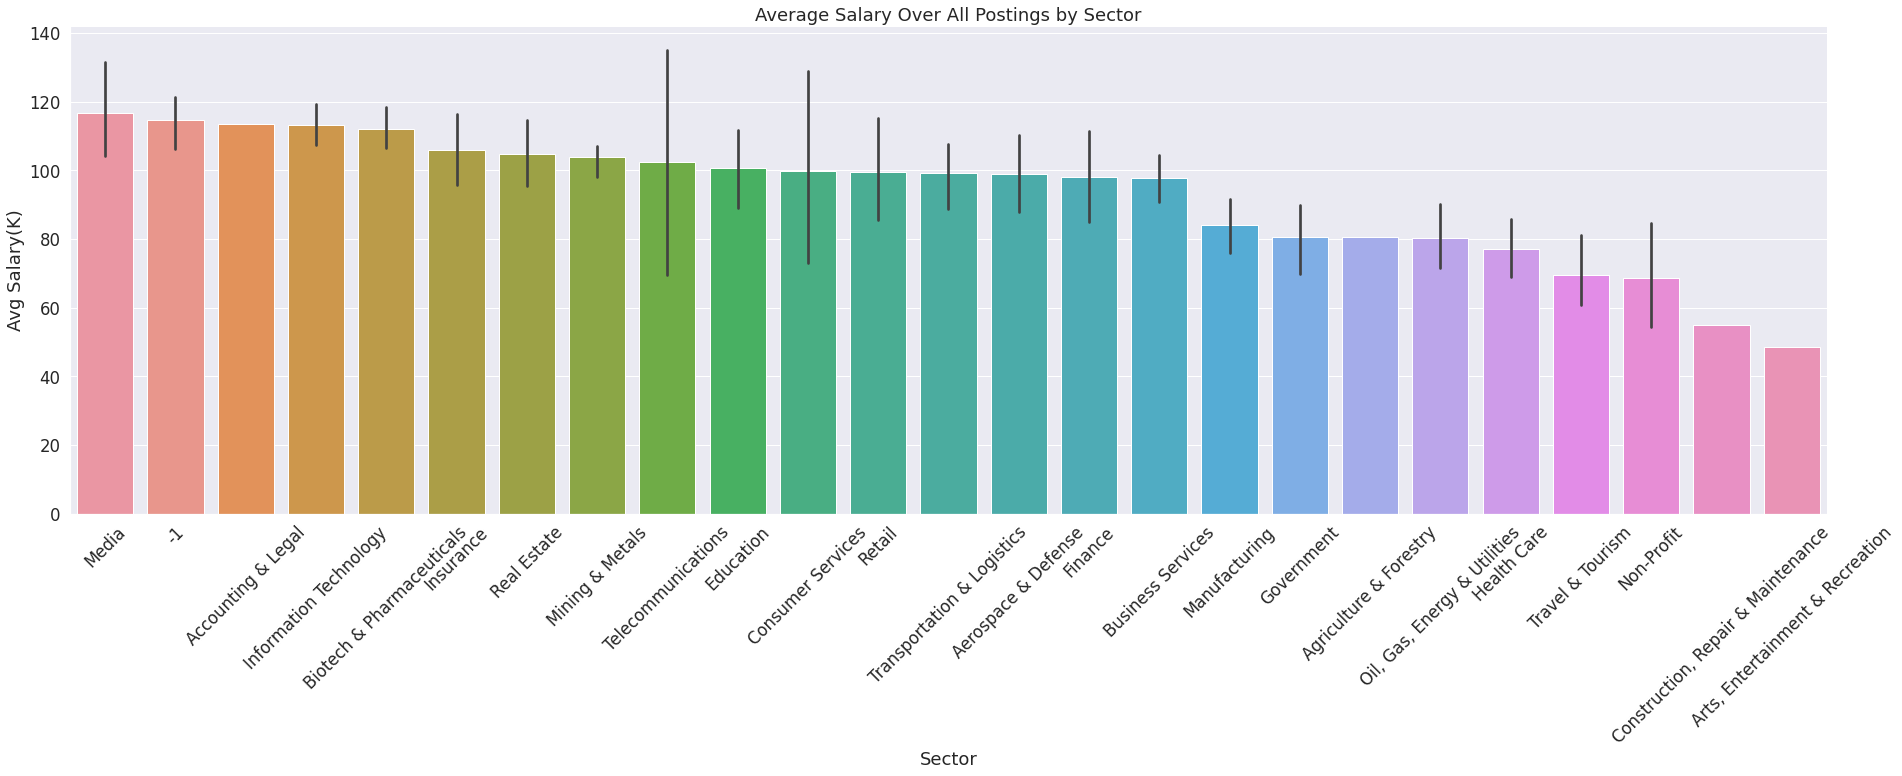

In [25]:
sns.catplot(x='Sector', y='Avg Salary(K)', order=df.groupby('Sector')['Avg Salary(K)'].agg(np.mean).sort_values(ascending=False).index, kind='bar', height=8, aspect= 3.4, data=df).set_xticklabels(rotation=45)
plt.title('Average Salary Over All Postings by Sector')
plt.show()

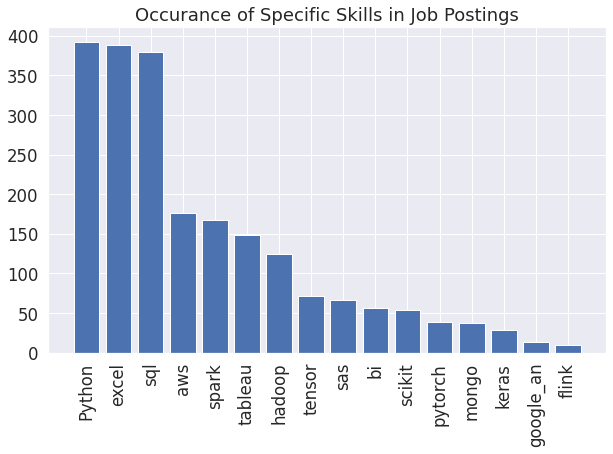

In [26]:
skills = df[['Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]
skill_sum = skills.drop(columns='Avg Salary(K)').sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(x=skill_sum.index, height=skill_sum.values)
plt.title('Occurance of Specific Skills in Job Postings')
plt.show()

In [27]:
print("Top 10 Most Requested Skills")
skill_sum.head(10)

Top 10 Most Requested Skills


Python     392
excel      388
sql        380
aws        176
spark      167
tableau    148
hadoop     124
tensor      72
sas         66
bi          56
dtype: int64

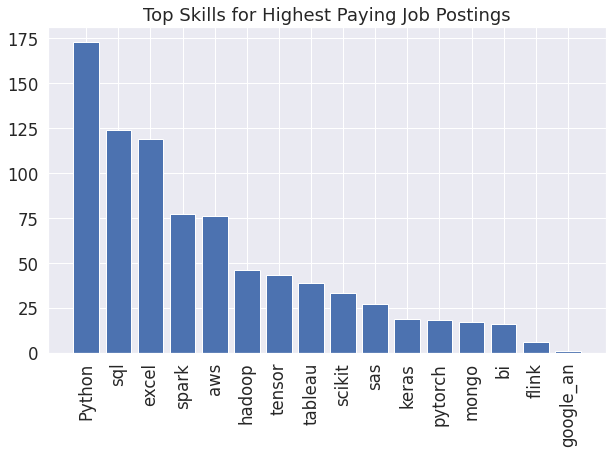

In [28]:
#sorting data by highest salary, slicing the top 250 then counting occurence of each skill in this subset.  
#This should give us the skills attached to the most well compensated job postings
highest_paying_skills = skills.sort_values('Avg Salary(K)', ascending=False).head(250).drop(columns='Avg Salary(K)').sum()
highest_paying_skills = highest_paying_skills.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(x=highest_paying_skills.index, height=highest_paying_skills.values)
plt.title('Top Skills for Highest Paying Job Postings')
plt.show()

In [29]:
print("Top 10 Most Lucrative Skills")
highest_paying_skills.sort_values(ascending=False).head(10)

Top 10 Most Lucrative Skills


Python     173
sql        124
excel      119
spark       77
aws         76
hadoop      46
tensor      43
tableau     39
scikit      33
sas         27
dtype: int64

In [30]:
#analyzing data for non-commercial organizations, basically any company that's goal isn't profit focused
altruist = df[(df['Type of ownership']=='Government') | (df['Type of ownership']=='Hospital') | (df['Type of ownership']=='Nonprofit Organization') | (df['Type of ownership']=='College / University') | (df['Type of ownership']=='School / School District')]
altruist_inverse = df[(df['Type of ownership']!='Government') & (df['Type of ownership']!='Hospital') & (df['Type of ownership']!='Nonprofit Organization') & (df['Type of ownership']!='College / University') & (df['Type of ownership']!='School / School District')]

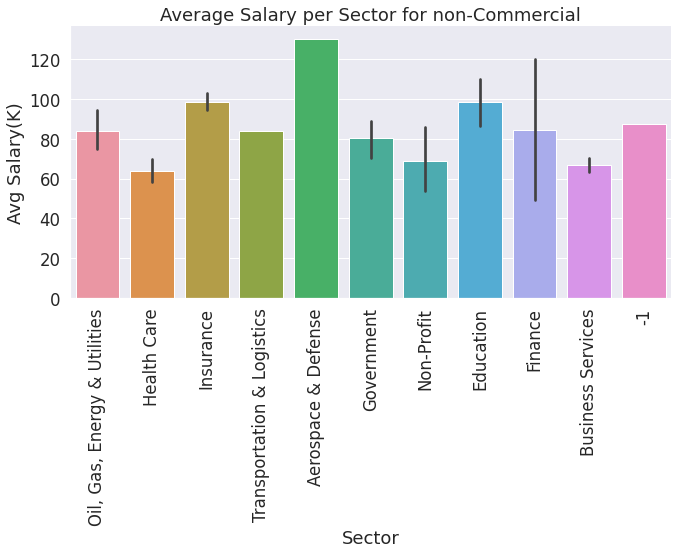

In [31]:
sns.catplot(x='Sector', y='Avg Salary(K)', kind='bar', height=5, aspect=2, data=altruist).set_xticklabels(rotation=90)
plt.title('Average Salary per Sector for non-Commercial')
plt.show()

Salary Difference: $ 26.35 k



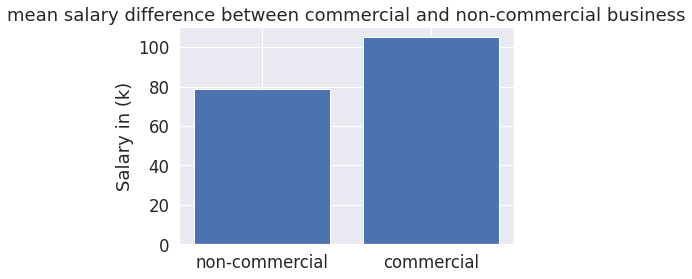

In [32]:
print('Salary Difference: $', round(altruist_inverse['Avg Salary(K)'].mean()-altruist['Avg Salary(K)'].mean(), 2), 'k')
print('')

plt.bar(x=['non-commercial', 'commercial'], height=[altruist['Avg Salary(K)'].mean(),altruist_inverse['Avg Salary(K)'].mean()])
plt.title('mean salary difference between commercial and non-commercial business')
plt.ylabel('Salary in (k)')
plt.show()

In [33]:
altruist_inverse['Avg Salary(K)'].mean()

105.03582554517133

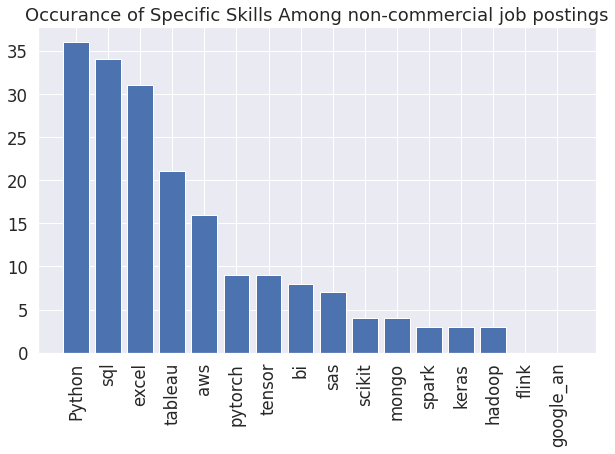

In [34]:
skills_a = altruist[['Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]
skill_a_sum = skills_a.drop(columns='Avg Salary(K)').sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(x=skill_a_sum.index, height=skill_a_sum.values)
plt.title('Occurance of Specific Skills Among non-commercial job postings')
plt.show()

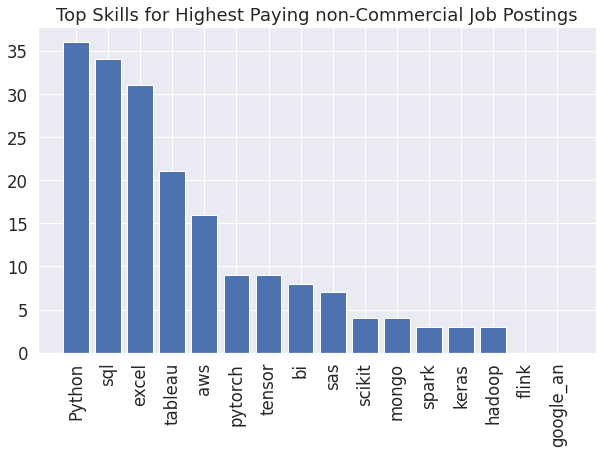

In [35]:
highest_paying_skills_a = skills_a.sort_values('Avg Salary(K)', ascending=False).head(250).drop(columns='Avg Salary(K)').sum()
highest_paying_skills_a = highest_paying_skills_a.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(x=highest_paying_skills_a.index, height=highest_paying_skills_a.values)
plt.title('Top Skills for Highest Paying non-Commercial Job Postings')
plt.show()

In [36]:
print('Top 20 Cities with the most non-commercial Data Science Job Postings')
print(altruist['Location'].value_counts().head(10))
print('')

print('Top 20 States with the most non-commercial Data Science Job Postings')
print(altruist['Job Location'].value_counts().head(10))

Top 20 Cities with the most non-commercial Data Science Job Postings
Pittsburgh, PA       11
Richland, WA         10
Rochester, NY         7
Denver, CO            4
Omaha, NE             4
Millville, DE         4
Scotts Valley, CA     4
Burleson, TX          4
Seattle, WA           3
Vail, CO              3
Name: Location, dtype: int64

Top 20 States with the most non-commercial Data Science Job Postings
PA    15
WA    13
VA     9
TX     9
NY     8
CO     7
CA     7
UT     6
DE     6
NE     4
Name: Job Location, dtype: int64


In [37]:
ideal = df[((df['job_title_sim']=='machine learning engineer') | (df['job_title_sim']=='data scientist')) & ((df['Job Location']=='CA') | (df['Job Location']=='MA') | (df['Job Location']=='IL')) & ((df['Type of ownership']=='Company - Private') | (df['Type of ownership']=='Subsidiary or Business Segment') | (df['Type of ownership']=='Company - Public'))]

In [38]:
print('Average Salary Ideal: ', round(ideal['Avg Salary(K)'].mean(), 2))
print('Average Salary: ', round(df['Avg Salary(K)'].mean(), 2))
print('Difference: ', round(df['Avg Salary(K)'].mean() - ideal['Avg Salary(K)'].mean(), 2))

Average Salary Ideal:  135.01
Average Salary:  101.48
Difference:  -33.52
